In [1]:
%matplotlib notebook
%matplotlib inline
import pandas as pd
import numpy as np
import re as re
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
import random, sys, os
import warnings
warnings.filterwarnings('ignore')
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegressionCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import (RandomForestClassifier, AdaBoostClassifier,
                              GradientBoostingClassifier, ExtraTreesClassifier)

Using matplotlib backend: nbAgg


<IPython.core.display.Javascript object>


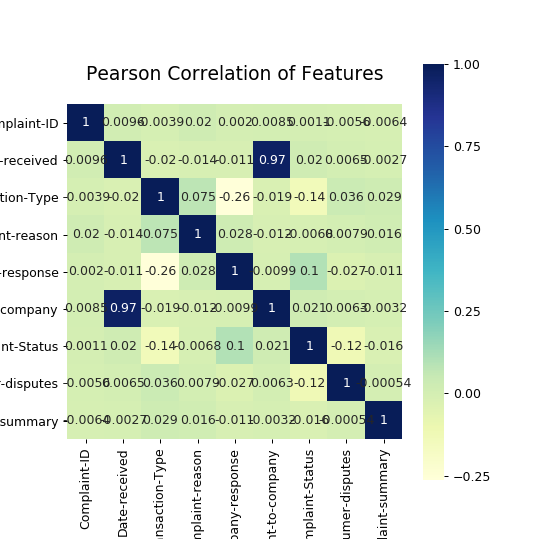

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16961 entries, 1 to 43259
Data columns (total 9 columns):
Complaint-ID                  16961 non-null int64
Date-received                 16961 non-null int64
Transaction-Type              16961 non-null int64
Complaint-reason              16961 non-null int64
Company-response              16961 non-null int64
Date-sent-to-company          16961 non-null int64
Complaint-Status              16961 non-null int64
Consumer-disputes             16961 non-null int64
Consumer-complaint-summary    16961 non-null int64
dtypes: int64(9)
memory usage: 1.3 MB
None


,Complaint-ID,Date-received,Transaction-Type,Complaint-reason,Company-response,Date-sent-to-company,Complaint-Status,Consumer-disputes,Consumer-complaint-summary
1,4390,637,3,48,7,647,3,0,15696
3,13099,131,4,24,4,133,1,0,13679
4,14784,748,2,66,9,759,1,0,8899
7,16112,75,0,68,9,75,1,0,9467
9,0,659,3,48,7,669,3,0,9849


In [2]:
%matplotlib
df = pd.read_csv('train.csv')
from sklearn import preprocessing
df = df.dropna()
df = df.apply(LabelEncoder().fit_transform)
plt.figure(figsize=(6,6))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
g = sns.heatmap(df.astype(float).corr(),linewidths=0,square=True,annot=True,cmap="YlGnBu")
plt.show()
print(df.info())
df.head()

In [11]:
#TRAIN
train = pd.read_csv('train.csv')
received_date = pd.to_datetime(train["Date-received"])
sent_date = pd.to_datetime(train["Date-sent-to-company"])
y = train['Complaint-Status']
train = train.drop(columns=["Date-sent-to-company","Date-received","Complaint-ID","Consumer-complaint-summary",'Complaint-Status'])
train = pd.get_dummies(train)
train['Days-to-Solve'] = (sent_date-received_date).dt. days
train = train.drop(columns=['Complaint-reason_Account terms and changes',
'Complaint-reason_Advertising',
'Complaint-reason_Incorrect exchange rate',
'Complaint-reason_Problem with an overdraft',
'Complaint-reason_Was approved for a loan, but didn\'t receive the money'])
y=pd.get_dummies(y)
print(train.info())
print(train.shape)
train.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43266 entries, 0 to 43265
Columns: 176 entries, Transaction-Type_Bank account or service to Days-to-Solve
dtypes: int64(1), uint8(175)
memory usage: 7.6 MB
None
(43266, 176)


,Transaction-Type_Bank account or service,Transaction-Type_Checking or savings account,Transaction-Type_Consumer Loan,Transaction-Type_Credit card,Transaction-Type_Credit card or prepaid card,Transaction-Type_Credit reporting,"Transaction-Type_Credit reporting, credit repair services, or other personal consumer reports",Transaction-Type_Debt collection,"Transaction-Type_Money transfer, virtual currency, or money service",Transaction-Type_Money transfers,...,Company-response_Company believes complaint represents an opportunity for improvement to better serve consumers,Company-response_Company believes it acted appropriately as authorized by contract or law,Company-response_Company believes the complaint is the result of a misunderstanding,Company-response_Company can't verify or dispute the facts in the complaint,Company-response_Company chooses not to provide a public response,Company-response_Company disputes the facts presented in the complaint,Company-response_Company has responded to the consumer and the CFPB and chooses not to provide a public response,Consumer-disputes_No,Consumer-disputes_Yes,Days-to-Solve
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [12]:
#TEST
test = pd.read_csv('test.csv')
received_date = pd.to_datetime(test["Date-received"])
sent_date = pd.to_datetime(test["Date-sent-to-company"])
idn = test["Complaint-ID"]
test = test.drop(columns=["Date-sent-to-company","Date-received","Complaint-ID","Consumer-complaint-summary"])
test = pd.get_dummies(test)
test['Days-to-Solve'] = (sent_date-received_date).dt. days
test = test.drop(columns=['Complaint-reason_Can\'t stop withdrawals from your bank account','Complaint-reason_Problem with cash advance'])
print(test.shape)
test.head(3)

(18543, 176)


,Transaction-Type_Bank account or service,Transaction-Type_Checking or savings account,Transaction-Type_Consumer Loan,Transaction-Type_Credit card,Transaction-Type_Credit card or prepaid card,Transaction-Type_Credit reporting,"Transaction-Type_Credit reporting, credit repair services, or other personal consumer reports",Transaction-Type_Debt collection,"Transaction-Type_Money transfer, virtual currency, or money service",Transaction-Type_Money transfers,...,Company-response_Company believes complaint represents an opportunity for improvement to better serve consumers,Company-response_Company believes it acted appropriately as authorized by contract or law,Company-response_Company believes the complaint is the result of a misunderstanding,Company-response_Company can't verify or dispute the facts in the complaint,Company-response_Company chooses not to provide a public response,Company-response_Company disputes the facts presented in the complaint,Company-response_Company has responded to the consumer and the CFPB and chooses not to provide a public response,Consumer-disputes_No,Consumer-disputes_Yes,Days-to-Solve
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
1,0,0,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,1,0,2
2,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [13]:
#Pre-Processed
train_column = list(train.columns)
test_column = list(test.columns)

for t2 in test_column:
    flag = 0
    for t1 in train_column:
        if t1 == t2:
            flag = 1
    if flag == 0:
        print(t2)
        
for t1 in test_column:
    flag = 0
    for t2 in train_column:
        if t1 == t2:
            flag = 1
    if flag == 0:
        print(t1)        

In [14]:
clf = DecisionTreeClassifier(criterion = 'entropy')
X_train, X_test, y_train, y_test = train_test_split(train, y)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(clf.score(X_train,y_train))
print(clf.score(X_test,y_test))

0.795217109926346
0.7562170657298697


In [15]:
from sklearn.metrics import accuracy_score,f1_score
print('Accuracy Score on train data: ', accuracy_score(y_true=y_train, y_pred=clf.predict(X_train)))
print('Accuracy Score on test data: ', accuracy_score(y_true=y_test, y_pred=y_pred))

Accuracy Score on train data:  0.795217109926346
Accuracy Score on test data:  0.7562170657298697


In [16]:
print('f1 weighted Score on train data: ', f1_score(y_true=y_train, y_pred=clf.predict(X_train),average='weighted'))
print('f1 weighted Score on test data: ', f1_score(y_true=y_test, y_pred=y_pred,average='weighted'))

f1 weighted Score on train data:  0.7592890489260772
f1 weighted Score on test data:  0.7098750995595151


In [17]:
clf = DecisionTreeClassifier(criterion = 'entropy')
clf.fit(train, y)
y_pred = clf.predict(test)
print(clf.score(train,y))

0.7920306938473628


In [18]:
for i in range(5):
    print(y_pred[i])

[0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0.]
[0. 1. 0. 0. 0.]
[0. 1. 0. 0. 0.]
[0. 1. 0. 0. 0.]


In [19]:
out = pd.DataFrame({'Closed':y_pred[:,0],'Closed with explanation':y_pred[:,1]
                   ,'Closed with monetary relief':y_pred[:,2],'Closed with non-monetary relief':y_pred[:,3]
                   ,'Untimely response':y_pred[:,4]})

In [20]:
out.head(3)

,Closed,Closed with explanation,Closed with monetary relief,Closed with non-monetary relief,Untimely response
0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0


In [21]:
out = out.idxmax(axis=1)
out.columns = ['Complaint-Status']
out.name="Complaint-Status"
out.head()

0                     Closed
1    Closed with explanation
2    Closed with explanation
3    Closed with explanation
4    Closed with explanation
Name: Complaint-Status, dtype: object

In [22]:
idn.head()

0    Te-1
1    Te-2
2    Te-3
3    Te-4
4    Te-5
Name: Complaint-ID, dtype: object

In [23]:
result = pd.concat([idn, out], axis=1)
result.head()

,Complaint-ID,Complaint-Status
0,Te-1,Closed
1,Te-2,Closed with explanation
2,Te-3,Closed with explanation
3,Te-4,Closed with explanation
4,Te-5,Closed with explanation


In [24]:
result.to_csv("result1.csv",index=False)

In [3]:
# AUTO ML
import h2o
from h2o.automl import H2OAutoML
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O cluster uptime:,17 mins 01 secs
H2O cluster timezone:,Asia/Kolkata
H2O data parsing timezone:,UTC
H2O cluster version:,3.22.0.2
H2O cluster version age:,1 month and 30 days
H2O cluster name:,H2O_from_python_kartikey_5mvgmx
H2O cluster total nodes:,1
H2O cluster free memory:,2.865 Gb
H2O cluster total cores:,8
H2O cluster allowed cores:,8
H2O cluster status:,"locked, healthy"


In [4]:
#TRAIN
train = pd.read_csv('train.csv')
received_date = pd.to_datetime(train["Date-received"])
sent_date = pd.to_datetime(train["Date-sent-to-company"])
y = train['Complaint-Status']
train = train.drop(columns=["Date-sent-to-company","Date-received","Complaint-ID","Consumer-complaint-summary",'Complaint-Status'])
train = pd.get_dummies(train)
train['Days-to-Solve'] = (sent_date-received_date).dt. days
train = train.drop(columns=['Complaint-reason_Account terms and changes',
'Complaint-reason_Advertising',
'Complaint-reason_Incorrect exchange rate',
'Complaint-reason_Problem with an overdraft',
'Complaint-reason_Was approved for a loan, but didn\'t receive the money'])

train['Complaint-Status'] = y
# y=pd.get_dummies(y)
# print(train.info())
# print(train.shape)
# train.head(3)

#TEST
test = pd.read_csv('test.csv')
received_date = pd.to_datetime(test["Date-received"])
sent_date = pd.to_datetime(test["Date-sent-to-company"])
idn = test["Complaint-ID"]
test = test.drop(columns=["Date-sent-to-company","Date-received","Complaint-ID","Consumer-complaint-summary"])
test = pd.get_dummies(test)
test['Days-to-Solve'] = (sent_date-received_date).dt. days
test = test.drop(columns=['Complaint-reason_Can\'t stop withdrawals from your bank account','Complaint-reason_Problem with cash advance'])
# print(test.shape)
# test.head(3)

In [5]:
htrain = h2o.H2OFrame(train)
htest = h2o.H2OFrame(test)
# htest_final = h2o.H2OFrame(test)
x = htrain.columns
y = 'Complaint-Status'
x.remove(y)
# This line is added in the case of classification
htrain[y] = htrain[y].asfactor()
# htest[y] = htest[y].asfactor()

Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%


In [6]:
aml = H2OAutoML(max_runtime_secs=4000)
aml.train(x=x, y=y, training_frame=htrain)
lb = aml.leaderboard
print(lb)
print('Done processing ....')

AutoML progress: |████████████████████████████████████████████████████████| 100%


model_id,mean_per_class_error,logloss,rmse,mse
StackedEnsemble_BestOfFamily_AutoML_20190121_103343,0.753227,0.616071,0.425956,0.181438
GBM_grid_1_AutoML_20190121_103343_model_2,0.759285,0.617597,0.427169,0.182473
StackedEnsemble_AllModels_AutoML_20190121_103343,0.760427,0.60959,0.424747,0.18041
DeepLearning_grid_1_AutoML_20190121_103343_model_1,0.761902,0.893002,0.43891,0.192642
GBM_4_AutoML_20190121_103343,0.765898,0.609527,0.426848,0.182199
GBM_3_AutoML_20190121_103343,0.766779,0.608836,0.426952,0.182288
GBM_1_AutoML_20190121_103343,0.767183,0.606867,0.425658,0.181184
GBM_2_AutoML_20190121_103343,0.767666,0.605427,0.425367,0.180937
GBM_5_AutoML_20190121_103343,0.77372,0.60678,0.427236,0.18253
DeepLearning_1_AutoML_20190121_103343,0.774889,0.643787,0.432208,0.186804



Done processing ....


In [7]:
print('Generate predictions…')
test_y = aml.leader.predict(htest)
test_y = test_y.as_data_frame()
test_y.head(3)

Generate predictions…
stackedensemble prediction progress: |████████████████████████████████████| 100%


,predict,Closed,Closed with explanation,Closed with monetary relief,Closed with non-monetary relief,Untimely response
0,Closed with explanation,0.007424,0.597237,0.163773,0.229692,0.001875
1,Closed with explanation,0.031693,0.821048,0.013288,0.129497,0.004474
2,Closed with explanation,0.005503,0.864327,0.008999,0.118677,0.002494


In [8]:
test_y['predict']

0                Closed with explanation
1                Closed with explanation
2                Closed with explanation
3                Closed with explanation
4                Closed with explanation
5                Closed with explanation
6                Closed with explanation
7                Closed with explanation
8                Closed with explanation
9                Closed with explanation
10       Closed with non-monetary relief
11               Closed with explanation
12               Closed with explanation
13               Closed with explanation
14               Closed with explanation
15               Closed with explanation
16               Closed with explanation
17               Closed with explanation
18               Closed with explanation
19               Closed with explanation
20               Closed with explanation
21               Closed with explanation
22               Closed with explanation
23               Closed with explanation
24              

In [9]:
# test_unnamed = pd.read_csv('test.csv')
Submission = pd.DataFrame({ 'Complaint-ID':idn ,
                            'Complaint-Status': test_y['predict'] })
Submission.to_csv("Submission_auto.csv", index=False)

In [10]:
print('DONE')

DONE


In [2]:
ProductName = [
    'P1', 'p2', 'p3', 'P1', 'p2', 'p3', 'P1', 'p2', 'p3', 'P1', 'p2', 'p3'
]
Date = [
    '01-01-2019', '01-01-2019', '01-01-2019', '02-01-2019', '02-01-2019',
    '02-01-2019', '04-01-2019', '04-01-2019', '04-01-2019', '06-01-2019',
    '06-01-2019', '06-01-2019'
]
Amount = [1000, 1000, 1000, 1878, 1540, 1482, 2010, 2540, 2365, 995, 860, 1000]

In [3]:
df = pd.DataFrame({'Product Name': ProductName, 'Date': Date, 'Amount': Amount})

In [4]:
df.head()

,Product Name,Date,Amount
0,P1,01-01-2019,1000
1,p2,01-01-2019,1000
2,p3,01-01-2019,1000
3,P1,02-01-2019,1878
4,p2,02-01-2019,1540


In [6]:
df_Product = df.groupby('Product Name').median()
df_Product

,Amount
Product Name,
P1,1439
p2,1270
p3,1241


In [13]:
data = {'ProductName': 'P1', 'Date': '03-04-2019', 'Amount': 1525}
for index, row in df_Product.iterrows():
    if data['Amount'] >= row['Amount'] - 0.1 * row['Amount'] and data[
            'Amount'] <= row['Amount'] + 0.1 * row['Amount']:
        print(index)

P1
